In [58]:
import heapq
import numpy as np

class KNN:
  def __init__(self, k, X, y):
    self.k = k
    self.X = X
    self.y = y

  def _find_label(self, mheap):
    csum = 0
    counter = 0
    while len(mheap) > 0:
      _, idx = heapq.heappop(mheap)
      csum = csum + self.y[idx]
      counter = counter + 1

    csum = csum / counter

    if csum >= 0.5:
      return 1
    else:
      return 0

  def predict(self, x):
    res = np.array([])
    for vt in x:

      mheap  = []
      for i, vc in enumerate(self.X):
        d = np.sqrt(np.sum(np.square(vt - vc)))
        heapq.heappush(mheap, (-d, i))
        if len(mheap) > self.k:
          heapq.heappop(mheap)

      t_label = self._find_label(mheap)
      res = np.append(res, t_label)
      #res.append(t_label)
    return res


In [20]:
X = np.random.rand(500,2)

In [21]:
y = np.random.randint(2, size=500)

In [22]:
import matplotlib.pyplot as plt


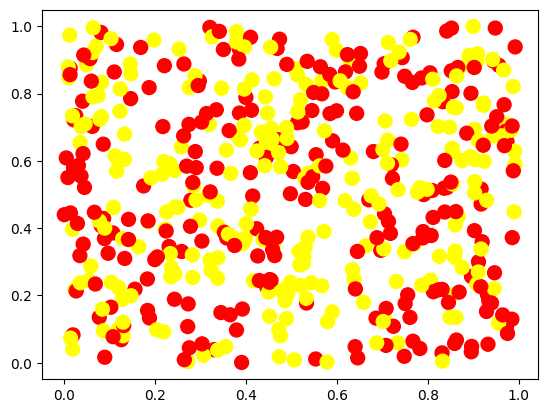

In [31]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.autumn,s=100)
plt.show()

In [33]:
test_X = np.random.rand(50,2)

In [36]:
test_y = np.random.randint(2, size=50)

In [65]:
test_X = np.array([[0,0],[1,1]])

In [66]:
test_X.shape

(2, 2)

In [59]:
knn=KNN(3,X,y)

In [67]:
res = knn.predict(test_X)

In [68]:
res

array([1., 0.])